In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib as inline
import warnings

warnings.filterwarnings("ignore")

# Reading files

train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

# making copies of our data

train_original = train.copy()
test_original = test.copy()



In [152]:
# See the columns of the data

train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [153]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [154]:
# print the dtypes of columns

train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [155]:
## shape of data

train.shape, test.shape

((614, 13), (367, 12))

### Univariate Analysis

<Axes: xlabel='Loan_Status'>

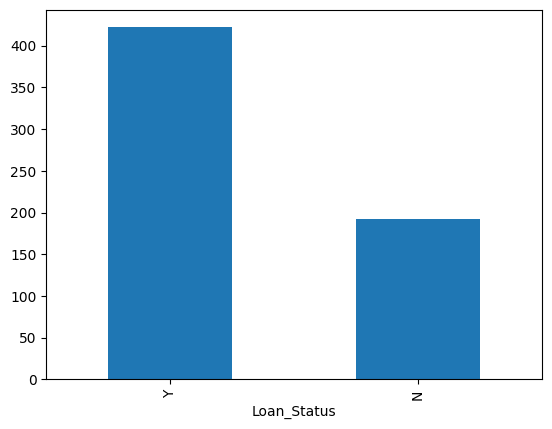

In [156]:
# univariate analysis for Loan Status

train['Loan_Status'].value_counts().plot.bar()

<Axes: title={'center': 'Credit_History'}, xlabel='Credit_History'>

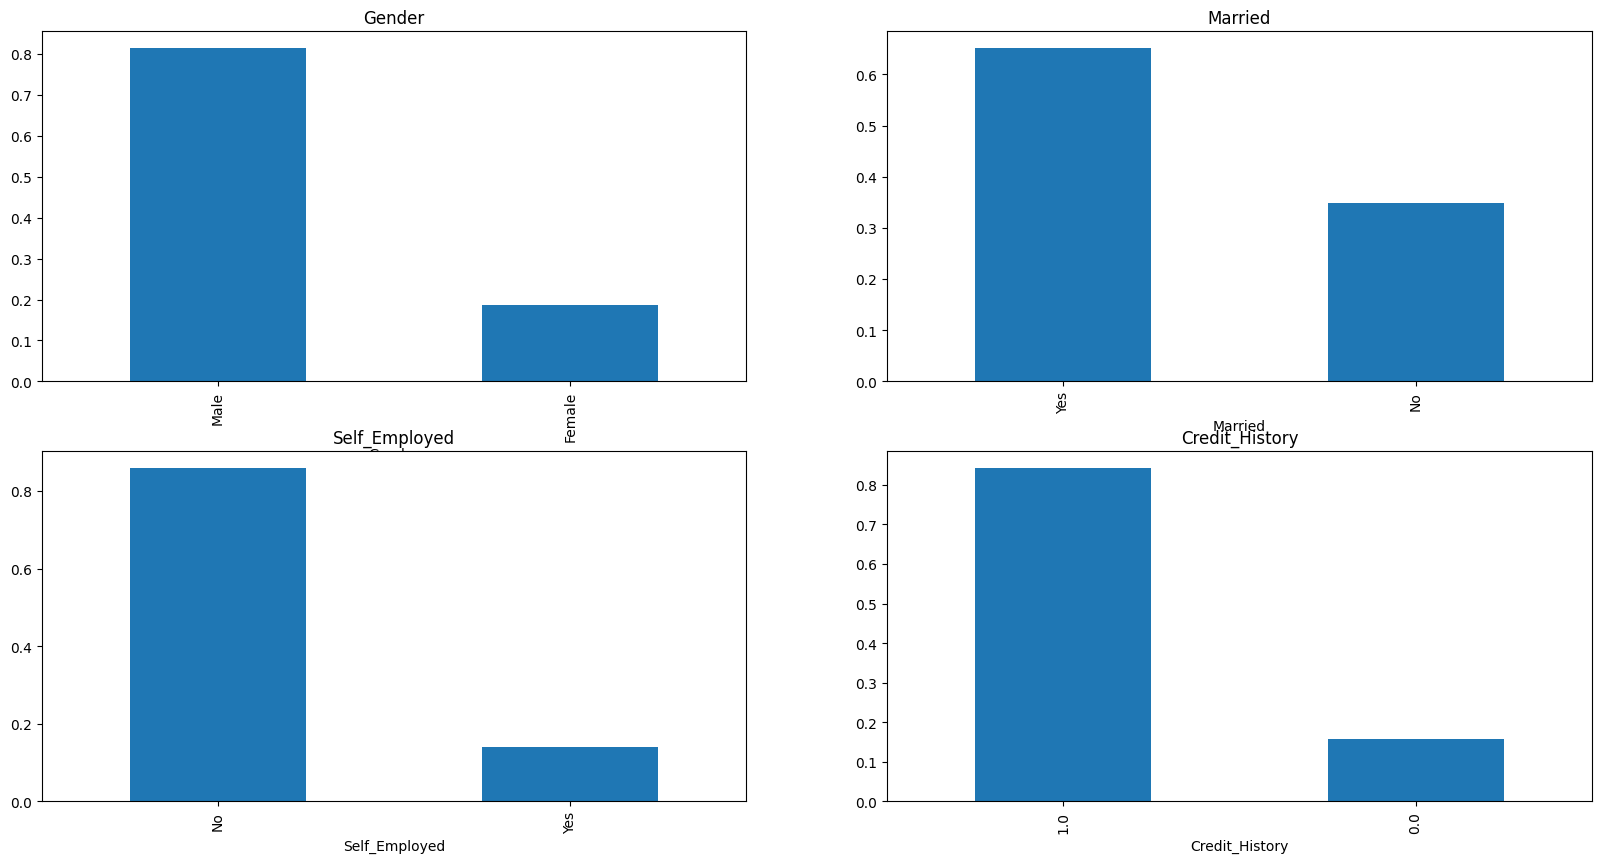

In [157]:
# See the categotical Variables  -  (Gender, Married, Self_Employed, Credit_History)

plt.figure(1)

plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = "Gender")

plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = "Married")

plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = "Self_Employed")

plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = "Credit_History")

##### The inferences from the data are as below
1. More men accessed the loans than women
2. More married people accessed the loans than unmarried
3. more self_employed people accesed the loans than not Self_employed
4. The credit repayment is high than non payment


<Axes: title={'center': 'Property_Area'}, xlabel='Property_Area'>

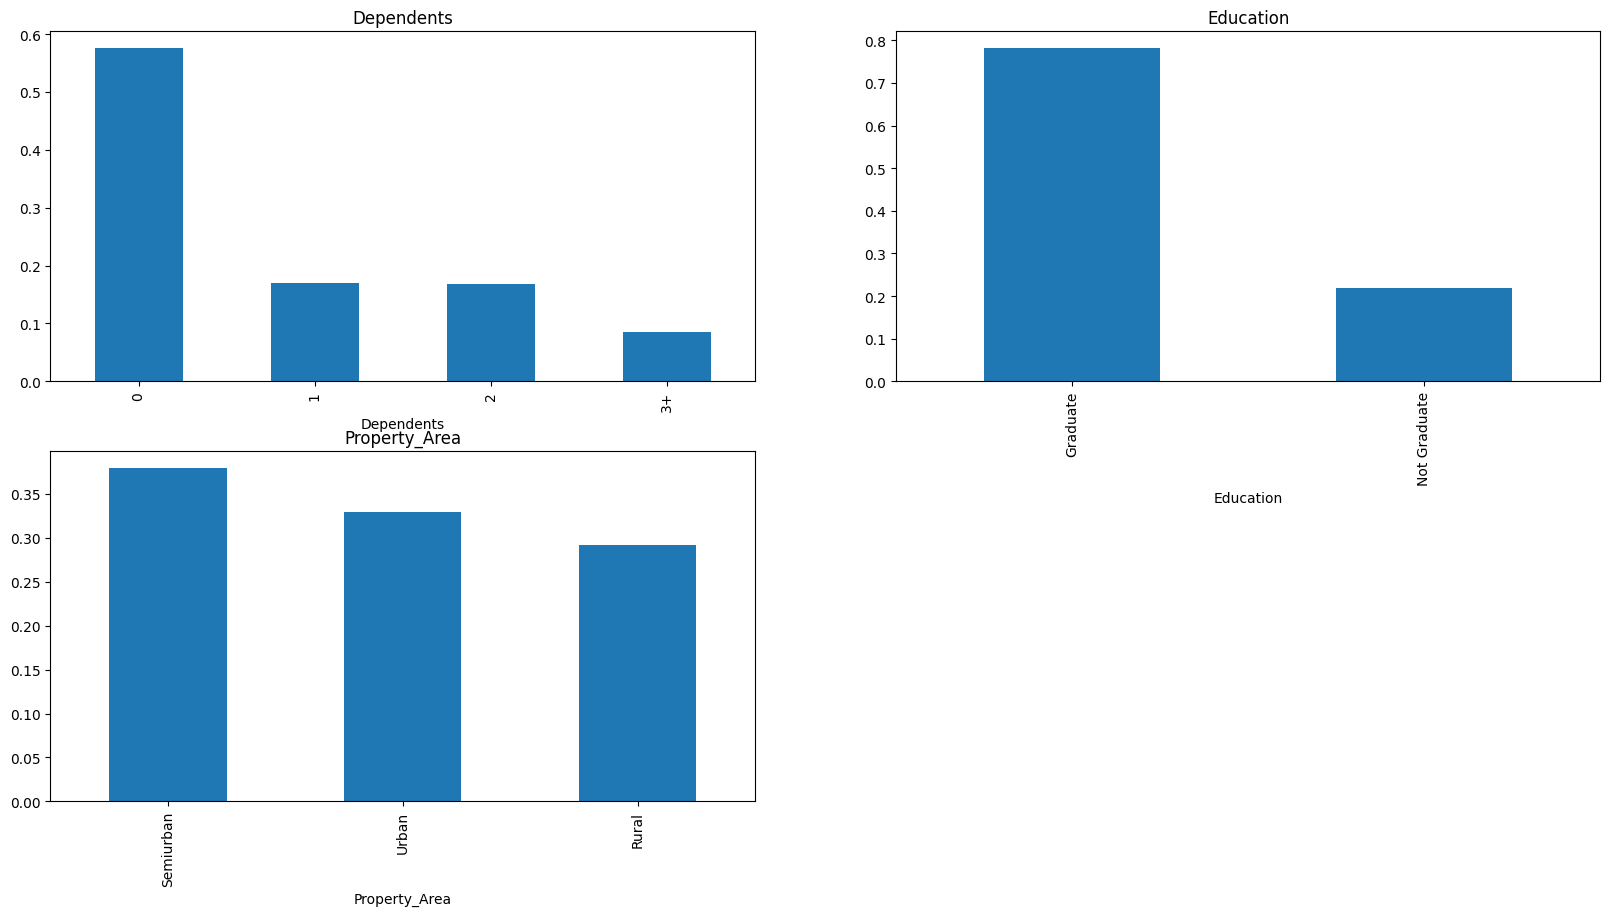

In [158]:
# Visualization for ordinal features.
# There are Dependents, Education,Property_area


plt.figure(1)

plt.subplot(221)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = "Dependents")

plt.subplot(222)
train['Education'].value_counts(normalize = True).plot.bar( title = "Education")

plt.subplot(223)
train['Property_Area'].value_counts(normalize = True).plot.bar( title = "Property_Area")

##### Inferences are
1. People with no dependants accesed the loans
2. more graduate people accesed the loans than non graduates
3. More semiurban people applied for loans than urban or rural people


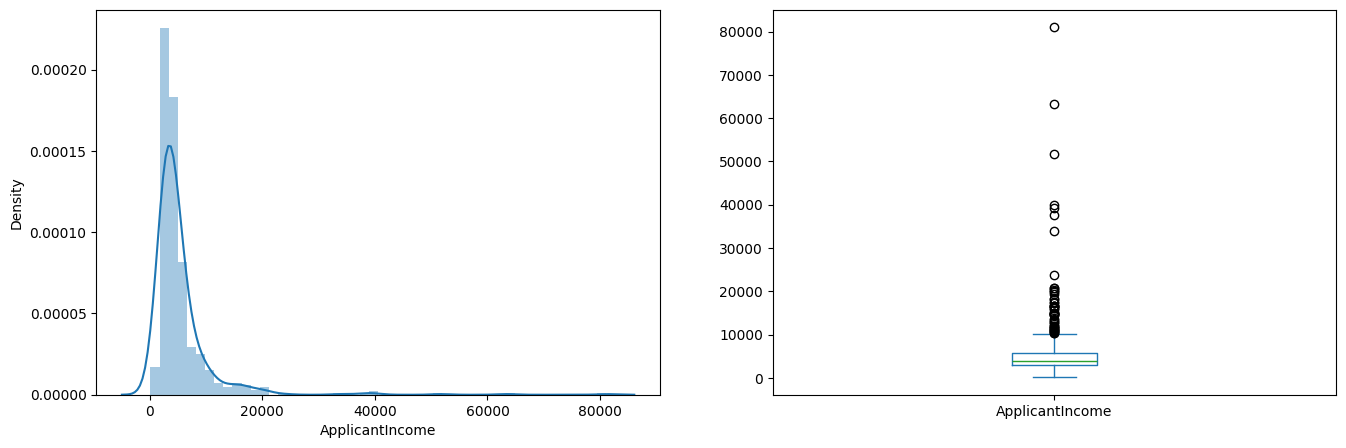

In [159]:
# Numerical Features exploration
# for income

plt.figure(1)


plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize =(16,5))
plt.show()

##### inferences are;
1. The Apllicant income distribution is righly slanted meaning presence of ouliers on the higher incomes. This assumption satisfied by the box plotting  as majority of plots is bounded on lower incomes (between 10,000 - 40,000) with a few spread beyond the 50,000 - 80,000 salaries - this is further confirmed as below to ascertain their presence and reason

Text(0.5, 0.98, '')

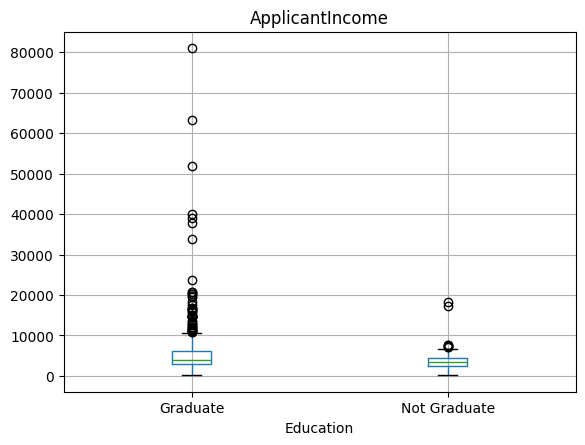

In [160]:
# Segragating the education to see reason for outlier
# Handling Outliers

train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

#### The Inference is that:
There exists some graduate who are paid very hefty salaries compared to their fellow graduates

<function matplotlib.pyplot.show(close=None, block=None)>

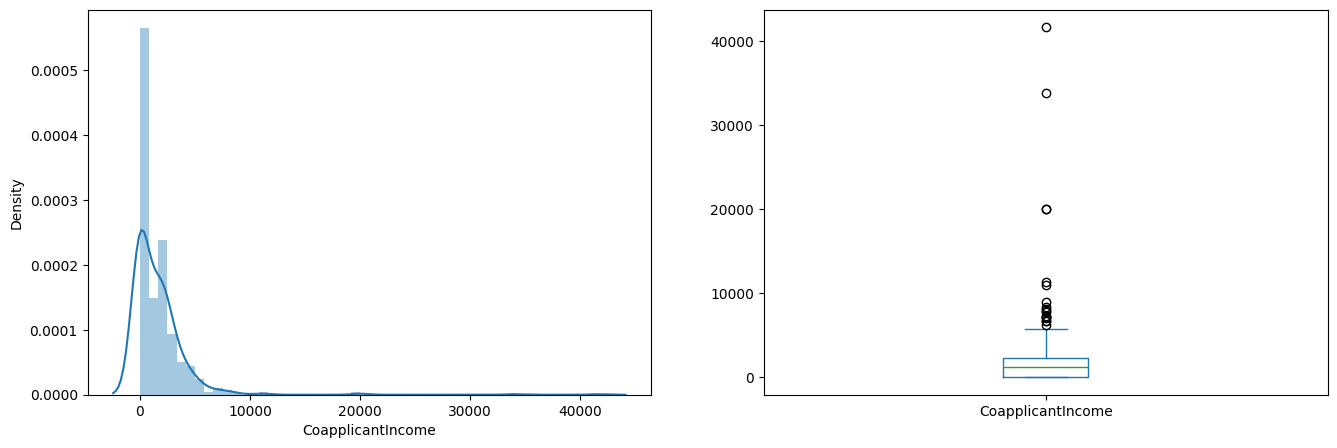

In [161]:
#coApplicant income Distribution
plt.figure(1)

plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))

plt.show

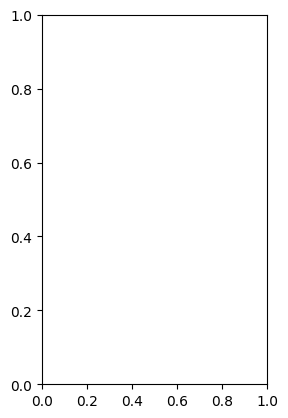

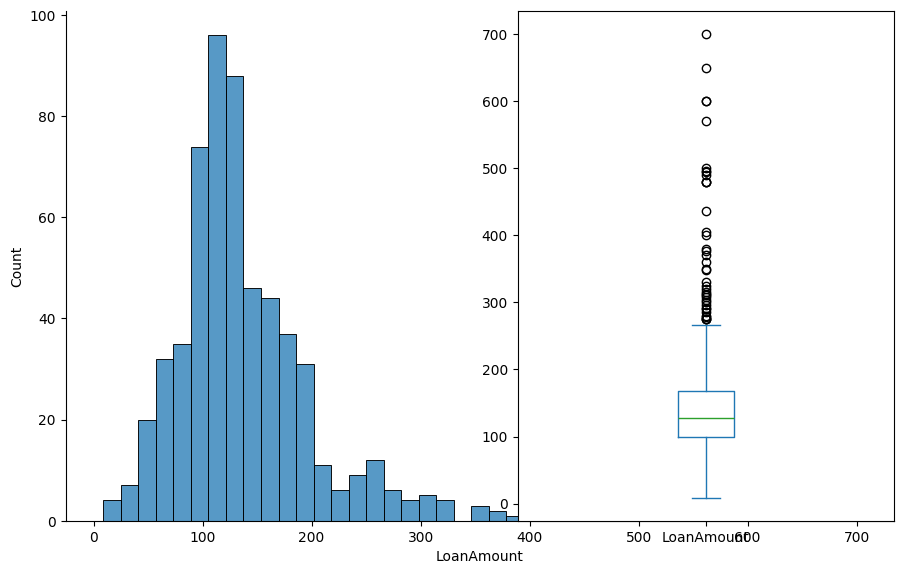

In [162]:
# distribution of loan Amount

plt.figure(1)

plt.subplot(121)

df = train.dropna()

sns.displot(train['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize = (10,6))

plt.show()

### Biovariate Analysis ( Features Correlation Analysis)

#### We came up with the below conclusions
1. Applicants with high income should be priotized for loans
2. Applicants who have repaid  their pevious loans should be considered first for loans
3. Loans approval should be pegged on the amount of loan i.e. if the loan is less ut should be considered first
4. the lesser the monthly instalment, the higher the chances for loan approval

Lets test this using bivariate analysis

<Axes: xlabel='Gender'>

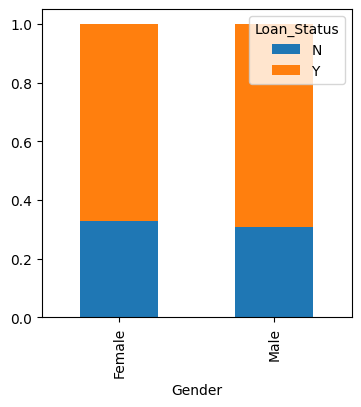

In [163]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])

Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True,figsize=(4,4) )

In [164]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='Married'>

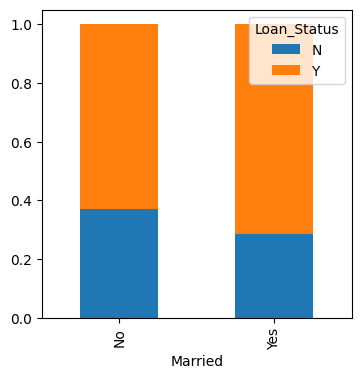

In [165]:
married = pd.crosstab(train['Married'], train['Loan_Status'])
married.div(married.sum(1), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

#### The inference is:
Married people got more loans than their unmarried counterparts

<Axes: xlabel='Education'>

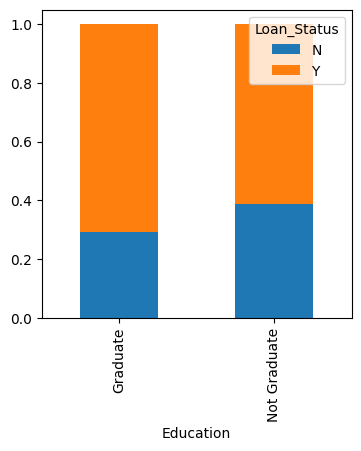

In [166]:
Education = pd.crosstab(train['Education'], train['Loan_Status'])

Education.div(Education.sum(1),axis=0).plot(kind='bar', stacked= True, figsize=(4,4))

#### The inference is:
More graduates accessed the loans than non graduates



<Axes: xlabel='Self_Employed'>

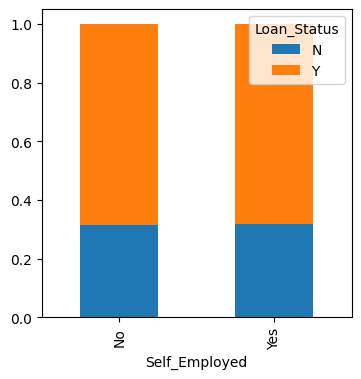

In [167]:
Self_employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_employed.div(Self_employed.sum(1), axis = 0).plot(kind='bar', stacked = True, figsize = (4,4))

##### Inference is:
The almost equal number Employed and Self_employed accessed the loans

<Axes: xlabel='Dependents'>

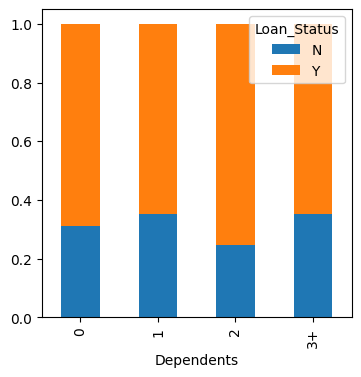

In [168]:
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1), axis = 0).plot(kind = 'bar', stacked= True, figsize = (4,4))

#### The inference is:
The Clients with dependant one accessed  more loans than the rest, with the two dependant accessing the least

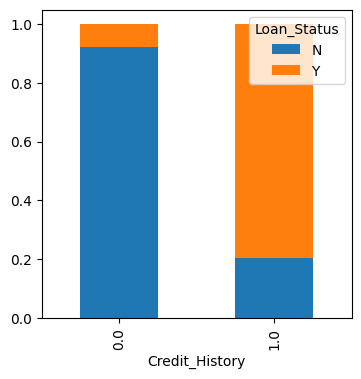

In [169]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

### Independent Variables

<Axes: xlabel='Loan_Status'>

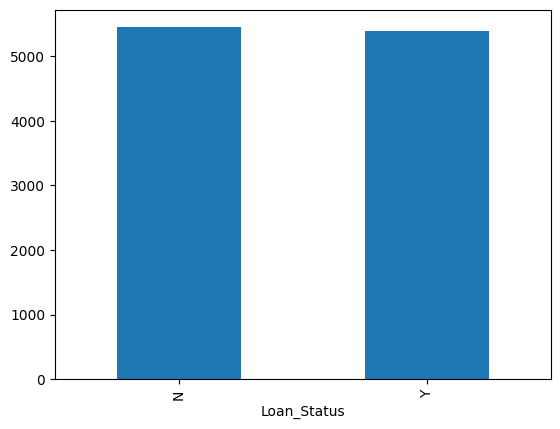

In [170]:
# Mean of the approved loans verusu un-approved loans

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

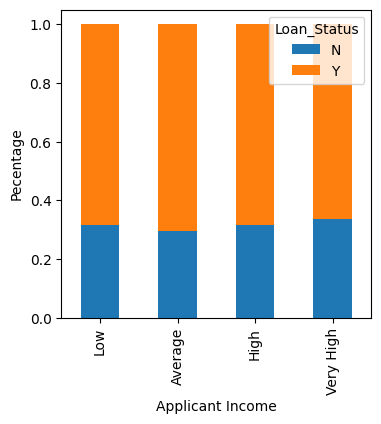

In [171]:
bins = [0,2500,4000,6000,81000]
group =['Low', 'Average', 'High', 'Very High']

train['Income Bin'] = pd.cut(train["ApplicantIncome"], bins, labels=group)

Income_Bin = pd.crosstab(train['Income Bin'],train['Loan_Status'])
Income_Bin.div(Income_Bin.sum(1).astype(float), axis = 0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.xlabel("Applicant Income")
p = plt.ylabel('Pecentage')


#### Inference is :
The earlier inference of that the Higher the income the higher the approval rate was misleading. This follows from the conclusion the applicant income level doesnt affect the approval rate. Lets analyse the Co_applicant income.

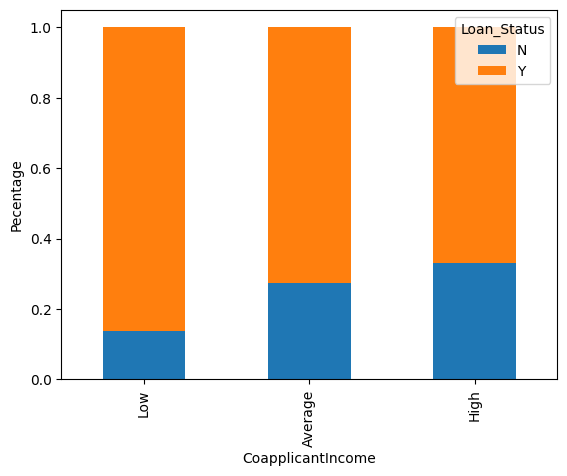

In [172]:
bins= [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_Bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)

#Coapplicant_Income_Bin = pd.cut(train['Coapplicant_Income_Bin'], train['Loan_Status'])

Coapplicant_Income_Bin=pd.crosstab(train['Coapplicant_Income_Bin'],train['Loan_Status'])

Coapplicant_Income_Bin.div(Coapplicant_Income_Bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True )
plt.xlabel("CoapplicantIncome")
P = plt.ylabel('Pecentage')

In [173]:
# Dropping addtional columns
#train = train.drop(['Income Bin','Coapplicant_Income_Bin'], axis=1)
#

train['Dependents'].replace('+3',3, inplace=True)
test['Dependents'].replace('+3',3, inplace=True)

train['Loan_Status'].replace('N',0, inplace=True)
train['Loan_Status'].replace('Y',1, inplace=True)

In [174]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income Bin', 'Coapplicant_Income_Bin'],
      dtype='object')

In [175]:
#Correlation for all variables

#train['LoanAmount'].dropna(axis=1)
#itrain = train[train['Dependents'],train['ApplicantIncome'],train['LoanAmount'],train['Credit_History'],train['Loan_Status']]

#matrix = train.corr()


#f, ax = plt.subplots(figsize=(9,6))

#sns.heatmap(matrix, vmax =.8, square=True, cmap='BuPu');

In [176]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income Bin,Coapplicant_Income_Bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,Average,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,Average,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,High,NaN


#### Missing Value Outlier Treatment

##### Missing Value imputation


In [177]:
train.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income Bin                  0
Coapplicant_Income_Bin    273
dtype: int64

In [178]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [179]:
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History              0
Property_Area               0
Loan_Status                 0
Income Bin                  0
Coapplicant_Income_Bin    273
dtype: int64

In [180]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [181]:
#Inputting  missing value by mode

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [182]:
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
Income Bin                  0
Coapplicant_Income_Bin    273
dtype: int64

In [183]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

### Outlier Treatment

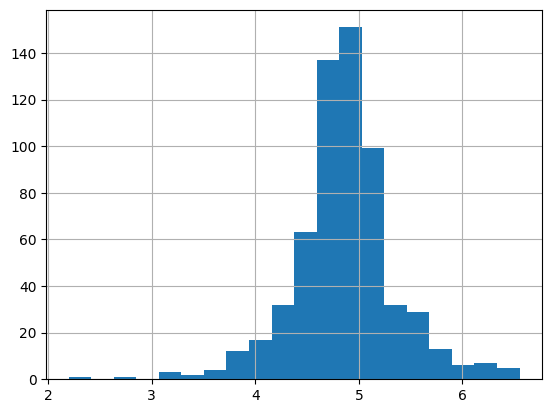

In [184]:
#log transformation

train['LoanAmount_Log'] = np.log(train["LoanAmount"])

train['LoanAmount_Log'].hist(bins=20)

test['LoanAmount_Log'] = np.log(test["LoanAmount"])


### Testing the Model

In [185]:
Test = test.drop('Loan_ID', axis=1)

In [186]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income Bin', 'Coapplicant_Income_Bin', 'LoanAmount_Log'],
      dtype='object')

In [187]:
X = train.drop('Loan_Status', axis=1)
Y = train.Loan_Status

In [210]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_Log,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,...,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Income Bin_Low,Income Bin_Average,Income Bin_High,Income Bin_Very High,Coapplicant_Income_Bin_Low,Coapplicant_Income_Bin_Average,Coapplicant_Income_Bin_High
0,5849,0.0,128.0,360.0,1.0,4.852030,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1,4583,1508.0,128.0,360.0,1.0,4.852030,False,True,False,False,...,True,False,False,False,False,True,False,False,True,False
2,3000,0.0,66.0,360.0,1.0,4.189655,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False
3,2583,2358.0,120.0,360.0,1.0,4.787492,False,False,False,True,...,False,False,True,False,True,False,False,False,True,False
4,6000,0.0,141.0,360.0,1.0,4.948760,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False


In [215]:
test = test.drop(['Coapplicant_Income_Bin','Income Bin'], axis=1)

KeyError: "['Coapplicant_Income_Bin', 'Income Bin'] not found in axis"

In [217]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_Log,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,4.852030,True,False,False,...,False,False,False,True,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,False,True,False,...,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,1,4.189655,False,False,True,...,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,False,False,False,...,False,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,1,4.948760,False,False,False,...,False,False,False,True,False,True,False,False,False,True


In [218]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [219]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,Y, test_size= 0.3)

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression(C=1.0,
                   class_weight=None,
                   dual=False,
                   fit_intercept=True,
                   intercept_scaling=1,
                   max_iter=100,
                   multi_class='ovr',
                   n_jobs=1,
                   penalty=12,
                   random_state=1,
                   solver='liblinear',
                   tol=0.0001,
                   verbose=0,
                   warm_start=False)


LogisticRegression(multi_class='ovr', n_jobs=1, penalty=12, random_state=1,
                   solver='liblinear')

In [221]:
pred_cv = model.predict(x_cv)

accuracy_score(y_cv,pred_cv)

0.7891891891891892

In [224]:
# making prediction for test dataset
pred_test = model.predict(test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Loan_Status
Feature names seen at fit time, yet now missing:
- Coapplicant_Income_Bin_Average
- Coapplicant_Income_Bin_High
- Coapplicant_Income_Bin_Low
- Income Bin_Average
- Income Bin_High
- ...


In [ ]:
#test.drop(test['Income Bin_High'], axis=1)

test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_Log',
       'Loan_ID_LP001002', 'Loan_ID_LP001003', 'Loan_ID_LP001005',
       ...
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Income Bin_Low', 'Income Bin_Average', 'Income Bin_High',
       'Income Bin_Very High', 'Coapplicant_Income_Bin_Low',
       'Coapplicant_Income_Bin_Average', 'Coapplicant_Income_Bin_High'],
      dtype='object', length=643)